<a href="https://colab.research.google.com/github/willieny/DSB/blob/main/DSB_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

Obtém os dados

In [ ]:
# concatena os arquivos (item ou licitação) de todos os anos
def concatenate(files):
  aux = pd.DataFrame()
  for file in files:
    df = pd.read_csv(file, encoding='utf8')
    aux = pd.concat([aux, df], ignore_index=True)
  return aux

In [ ]:
from glob import glob

files = sorted(glob('item*.csv'))
item = concatenate(files)
files = sorted(glob('licitacao*.csv'))
licitacao = concatenate(files)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (19,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8,19,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (52,54) have mixed

Análise inicial dos dados

In [ ]:
item.sample(n=5)

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_ESTIMADO,VL_TOTAL_ESTIMADO,DT_REF_VALOR_ESTIMADO,PC_BDI_ESTIMADO,PC_ENCARGOS_SOCIAIS_ESTIMADO,CD_FONTE_REFERENCIA,DS_FONTE_REFERENCIA,TP_RESULTADO_ITEM,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,PC_BDI_HOMOLOGADO,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
3007153,50500,3.0,2019,TMP,1,9,1.4.2,1.4. Sinalização Horizontal e Vertical: Sin...,66.20,M2,33.42,2212.40,2018-10-01,27.03,4.50,72947,SINAPI,NaN,NaN,NaN,NaN,NaN,S,9.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190126,50900,5.0,2019,PRP,1,253,253,tomada interna dupla,100,UN,8.90,890.00,NaN,0.00,0.00,NaN,NaN,A,5.00,500,0.0,0.00,NaN,NaN,NaN,J,14957835000149,NaN,NaN,N,NaN,NaN
1536366,63400,8.0,2018,TMP,1,19,4180202,"PLACA ALUMINIO ""PERIGO"" 24 x 34cm",1,UN,96.19,96.19,2018-05-28,28.25,85.03,8969,PLEO/FRANARIN,NaN,85.60,85.6,26.7,38.23,E,NaN,NaN,J,10591169000117,NaN,NaN,NaN,NaN,NaN
1924340,88175,1.0,2018,CPC,1,79,2100004,RESSONÂNCIA MAGNÉTICA DE ABDÔMEN SUPERIOR S/CO...,1343,UN,268.75,360931.25,2018-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
1744685,63300,7.0,2018,PRE,1,23,23,"Cesto fechado, confeccionado de plástico recic...",200,PC,29.95,5990.00,2018-02-02,NaN,NaN,NaN,NaN,A,12.86,2572,NaN,NaN,NaN,NaN,NaN,J,11821860000102,NaN,NaN,L,NaN,NaN


In [ ]:
licitacao.sample(n=5)

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,TP_NIVEL_JULGAMENTO,DT_AUTORIZACAO_ADESAO,TP_CARACTERISTICA_OBJETO,TP_NATUREZA,TP_REGIME_EXECUCAO,BL_PERMITE_SUBCONTRATACAO,TP_BENEFICIO_MICRO_EPP,TP_FORNECIMENTO,TP_ATUACAO_REGISTRO,NR_LICITACAO_ORIGINAL,ANO_LICITACAO_ORIGINAL,NR_ATA_REGISTRO_PRECO,DT_ATA_REGISTRO_PRECO,PC_TAXA_RISCO,TP_EXECUCAO,TP_DISPUTA,TP_PREQUALIFICACAO,BL_INVERSAO_FASES,TP_RESULTADO_GLOBAL,CNPJ_ORGAO_GERENCIADOR,NM_ORGAO_GERENCIADOR,DS_OBJETO,CD_TIPO_FUNDAMENTACAO,NR_ARTIGO,DS_INCISO,DS_LEI,DT_INICIO_INSCR_CRED,DT_FIM_INSCR_CRED,DT_INICIO_VIGEN_CRED,DT_FIM_VIGEN_CRED,VL_LICITACAO,BL_ORCAMENTO_SIGILOSO,BL_RECEBE_INSCRICAO_PER_VIG,BL_PERMITE_CONSORCIO,DT_ABERTURA,DT_HOMOLOGACAO,DT_ADJUDICACAO,BL_LICIT_PROPRIA_ORGAO,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
69898,73900,PM DE BARRA DO RIO AZUL,26.0,2017,PRD,NaN,NaN,NaN,059,2017.0,LOC,PUB,NSA,G,NaN,IU,N,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Locação de uma sala comercial com área de 40m²...,A24X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.00,NaN,NaN,N,2017-08-10,NaN,NaN,S,F,68787731053,NaN,NaN,NaN,S,NaN,NaN,NaN,N
201811,88370,CENTRAL DE LICITAÇÕES DO ESTADO,300.0,2019,PRE,10.0,2018.0,G,19130000023185,2019.0,COM,ADH,MPR,L,NaN,LT,R,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,NaN,NaN,N,NaN,NaN,NaN,AQUISIÇÃO DE BENS DA(S) FAMÍLIA(S):0435-EQUIPA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149585.32,S,NaN,S,2019-07-09,2019-07-18,2019-07-10,S,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,S
37166,83300,PM DE CAPIVARI DO SUL,17401.0,2017,PRD,NaN,NaN,NaN,17401,2017.0,OUS,PUB,NSA,G,NaN,IU,N,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,CONTRATAÇÃO EMPRESA PRESTAÇÃO SERVIÇOS RECOLHI...,A24II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5307.36,NaN,NaN,N,2017-02-03,NaN,NaN,S,J,1.0352e+13,NaN,NaN,NaN,S,NaN,NaN,NaN,N
6597,45900,PM DE CRISSIUMAL,7.0,2016,CHP,2242016.0,2016.0,P,14,2016.0,COM,ADH,MPR,I,NaN,IT,O,NaN,N,N,P,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,CHAMADA PÚBLICA PARA AQUISIÇÃO DE GÊNEROS ALIM...,NaN,NaN,NaN,NaN,2016-05-28,2016-06-15,2016-06-22,2016-07-31,4391.82,NaN,NaN,N,2016-06-15,2016-06-22,2016-06-15,S,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
37557,48401,CM DE FREDERICO WESTPHALEN,1.0,2017,PRI,NaN,NaN,NaN,1,2017.0,OUS,PUB,NSA,G,NaN,IU,N,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Contratação de empresa de radiodifusão para di...,A25CAPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54000.00,NaN,NaN,N,2017-02-20,NaN,NaN,S,J,5.36328e+12,NaN,NaN,NaN,S,NaN,NaN,NaN,N


In [ ]:
print(licitacao.info())
print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237011 entries, 0 to 237010
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CD_ORGAO                     237011 non-null  int64  
 1   NM_ORGAO                     237011 non-null  object 
 2   NR_LICITACAO                 237011 non-null  float64
 3   ANO_LICITACAO                237011 non-null  int64  
 4   CD_TIPO_MODALIDADE           237011 non-null  object 
 5   NR_COMISSAO                  153245 non-null  float64
 6   ANO_COMISSAO                 153245 non-null  float64
 7   TP_COMISSAO                  153245 non-null  object 
 8   NR_PROCESSO                  236858 non-null  object 
 9   ANO_PROCESSO                 236857 non-null  float64
 10  TP_OBJETO                    237011 non-null  object 
 11  CD_TIPO_FASE_ATUAL           237011 non-null  object 
 12  TP_LICITACAO                 237011 non-null  object 
 13 

In [ ]:
print(licitacao.columns.values)
print(item.columns.values)

['CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE'
 'NR_COMISSAO' 'ANO_COMISSAO' 'TP_COMISSAO' 'NR_PROCESSO' 'ANO_PROCESSO'
 'TP_OBJETO' 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'TP_NIVEL_JULGAMENTO'
 'DT_AUTORIZACAO_ADESAO' 'TP_CARACTERISTICA_OBJETO' 'TP_NATUREZA'
 'TP_REGIME_EXECUCAO' 'BL_PERMITE_SUBCONTRATACAO' 'TP_BENEFICIO_MICRO_EPP'
 'TP_FORNECIMENTO' 'TP_ATUACAO_REGISTRO' 'NR_LICITACAO_ORIGINAL'
 'ANO_LICITACAO_ORIGINAL' 'NR_ATA_REGISTRO_PRECO' 'DT_ATA_REGISTRO_PRECO'
 'PC_TAXA_RISCO' 'TP_EXECUCAO' 'TP_DISPUTA' 'TP_PREQUALIFICACAO'
 'BL_INVERSAO_FASES' 'TP_RESULTADO_GLOBAL' 'CNPJ_ORGAO_GERENCIADOR'
 'NM_ORGAO_GERENCIADOR' 'DS_OBJETO' 'CD_TIPO_FUNDAMENTACAO' 'NR_ARTIGO'
 'DS_INCISO' 'DS_LEI' 'DT_INICIO_INSCR_CRED' 'DT_FIM_INSCR_CRED'
 'DT_INICIO_VIGEN_CRED' 'DT_FIM_VIGEN_CRED' 'VL_LICITACAO'
 'BL_ORCAMENTO_SIGILOSO' 'BL_RECEBE_INSCRICAO_PER_VIG'
 'BL_PERMITE_CONSORCIO' 'DT_ABERTURA' 'DT_HOMOLOGACAO' 'DT_ADJUDICACAO'
 'BL_LICIT_PROPRIA_ORGAO' 'TP_DOCUMENTO_FORNE

In [ ]:
print("Formato do dataframe licitacao: " , licitacao.shape)
print("Formato do dataframe item: ", item.shape)

Formato do dataframe licitacao:  (237011, 61)
Formato do dataframe item:  (3200756, 32)


Limpa e prepara os dados


In [ ]:
# seleciona algumas colunas de interesse
licitacao = licitacao.loc[licitacao['TP_OBJETO'] == 'COM'].reset_index(drop=True)
licitacao = licitacao[['CD_ORGAO', 'ANO_LICITACAO', 'NM_ORGAO', 'DS_OBJETO', 'TP_OBJETO']]
licitacao.head()

,CD_ORGAO,ANO_LICITACAO,NM_ORGAO,DS_OBJETO,TP_OBJETO
0,84100,2016,PM DE ESPERANÇA DO SUL,Aquisição de merenda escolar,COM
1,82701,2016,CM DE XANGRI-LÁ,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,COM
2,84100,2016,PM DE ESPERANÇA DO SUL,Aquisição de materiais de limpeza para as dive...,COM
3,53100,2016,PM DE NOVA PALMA,Aquisição de tubos de concreto,COM
4,86800,2016,PM DE BOA VISTA DO SUL,Aquisição de tubos de concreto,COM


In [ ]:
# remove linhas com dados faltantes
licitacao.isnull().sum()
item.isnull().sum()
item = item.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False).reset_index(drop=True)

In [ ]:
# remove pontuação
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)
licitacao['preprocessado'] = licitacao['DS_OBJETO'].map(punc_lower).str.lower()

# remove linhas onde DS_OBJETO tem dados inválidos
index = licitacao.loc[licitacao['preprocessado']==''].index
licitacao = licitacao.drop(index=index).reset_index(drop=True)

# remove parte dos textos de DS_OBJETO
aquisicao = lambda x: re.sub('aquisição de ', '', x)
fornecimento = lambda x: re.sub('fornecimento de ', '', x)
manutencao = lambda x: re.sub(' para manutenção (\w*\s)*(\w?\w*)*', '', x)
materiais = lambda x: re.sub('material', 'materiais', x)

licitacao['preprocessado'] = licitacao['preprocessado'].map(aquisicao)
licitacao['preprocessado'] = licitacao['preprocessado'].map(fornecimento)
licitacao['preprocessado'] = licitacao['preprocessado'].map(manutencao)
licitacao['preprocessado'] = licitacao['preprocessado'].map(materiais)

print("Formato do dataframe licitacao: " , licitacao.shape)
print("Formato do dataframe item: ", item.shape)

Formato do dataframe licitacao:  (82092, 6)
Formato do dataframe item:  (0, 32)


In [ ]:
# converte dados categóricos em dados numéricos em licitacao
licitacao['category_id'] = licitacao['preprocessado'].factorize()[0]
category_id_df = licitacao[['preprocessado', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'preprocessado']].values)
licitacao.head()

,CD_ORGAO,ANO_LICITACAO,NM_ORGAO,DS_OBJETO,TP_OBJETO,preprocessado,category_id
0,84100,2016,PM DE ESPERANÇA DO SUL,Aquisição de merenda escolar,COM,merenda escolar,0
1,82701,2016,CM DE XANGRI-LÁ,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,COM,protocoladora e fragmentadora de papel,1
2,84100,2016,PM DE ESPERANÇA DO SUL,Aquisição de materiais de limpeza para as dive...,COM,materiais de limpeza para as diversas secretarias,2
3,53100,2016,PM DE NOVA PALMA,Aquisição de tubos de concreto,COM,tubos de concreto,3
4,86800,2016,PM DE BOA VISTA DO SUL,Aquisição de tubos de concreto,COM,tubos de concreto,3


Análise e exploração dos dados.

In [ ]:
# frequência dos objetos em licitacao
def os10maiscomprados(licitacao):
    freq = licitacao.groupby(['category_id']).preprocessado.count() 
    freq = freq.sort_values(ascending=False)
    index = freq.index
    freq = freq.to_list()
    index = index.to_list()
    
    produtos = pd.DataFrame(
    {'index': index,
     'freq': freq
    })

    top10 = produtos[:10]
    return top10

# converte numéricos para categóricos
def converteobjetos(top10):
    obj = []
    for i in top10['index']:
        obj.append(id_to_category[i])
    return obj

In [ ]:
top10 = os10maiscomprados(licitacao)
top10

,index,freq
0,131,845
1,5,497
2,17,282
3,3,259
4,220,187
5,2562,171
6,98,167
7,141,162
8,314,159
9,215,127


In [ ]:
objetos = converteobjetos(top10)
objetos

['materiais',
 'medicamentos',
 'materiais de expediente',
 'tubos de concreto',
 'materiais elétrico',
 'peças',
 'materiais de construção',
 'merenda escolar',
 'gêneros alimentícios',
 'materiais de limpeza']

Visualização dos dados

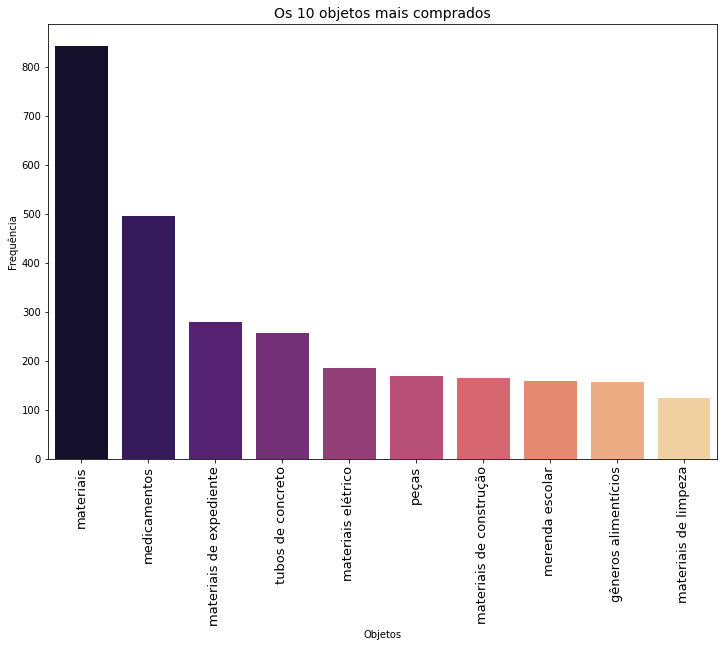

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
sns.set_theme(style="darkgrid")

ax = sns.barplot(data=top10, x=top10['index'], y=top10['freq'], order = top10['index'], palette="magma")
ax.set_xticklabels(labels=objetos, rotation=90, fontsize=13)
ax.set(xlabel="Objetos", ylabel = "Frequência")

plt.title('Os 10 objetos mais comprados', fontsize=14)
plt.show()

In [ ]:
licitacao2016 = licitacao.loc[licitacao['ANO_LICITACAO'] == 2016]
licitacao2017 = licitacao.loc[licitacao['ANO_LICITACAO'] == 2017]
licitacao2018 = licitacao.loc[licitacao['ANO_LICITACAO'] == 2018]
licitacao2019 = licitacao.loc[licitacao['ANO_LICITACAO'] == 2019]
top10de2016 = os10maiscomprados(licitacao2016)
objetos2016 = converteobjetos(top10de2016)
top10de2017 = os10maiscomprados(licitacao2017)
objetos2017 = converteobjetos(top10de2017)
top10de2018 = os10maiscomprados(licitacao2018)
objetos2018 = converteobjetos(top10de2018)
top10de2019 = os10maiscomprados(licitacao2019)
objetos2019 = converteobjetos(top10de2019)

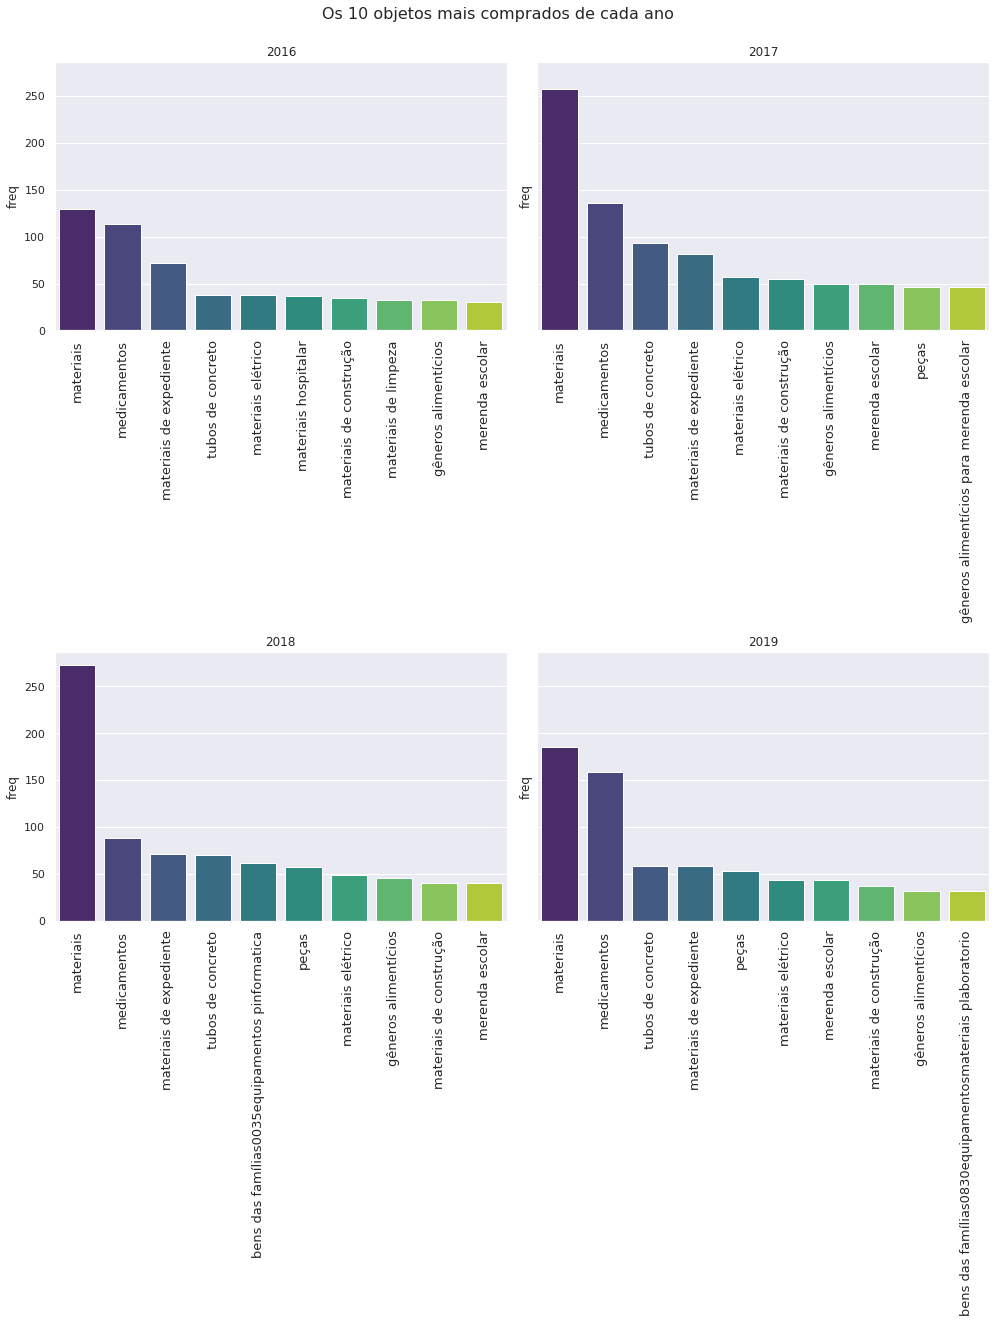

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 18), sharey=True)
fig.suptitle('Os 10 objetos mais comprados de cada ano', fontsize=16, y=1.02)

sns.barplot(ax=axes[0,0], x=top10de2016.index, y=top10de2016.freq, palette="viridis")
axes[0,0].set_title('2016')
axes[0,0].set_xticklabels(labels=objetos2016, rotation=90, fontsize=13)

sns.barplot(ax=axes[0,1], x=top10de2017.index, y=top10de2017.freq, palette="viridis")
axes[0,1].set_title('2017')
axes[0,1].set_xticklabels(labels=objetos2017, rotation=90, fontsize=13)

sns.barplot(ax=axes[1,0], x=top10de2018.index, y=top10de2018.freq, palette="viridis")
axes[1,0].set_title('2018')
axes[1,0].set_xticklabels(labels=objetos2018, rotation=90, fontsize=13)

sns.barplot(ax=axes[1,1], x=top10de2019.index, y=top10de2019.freq, palette="viridis")
axes[1,1].set_title('2019')
axes[1,1].set_xticklabels(labels=objetos2019, rotation=90, fontsize=13)

fig.tight_layout()